# 08.02.20

**Author:** Miron Rogovets

---

### Task 1. Chi-square test. Use data_games.dta file.

**1.1.** Analyze the relationship between **payment_type** and **payment_method** using Chi-square statistical test. Is the Chi-square test applicable for this pair of variables? If yes, formulate hypotheses, interpret the results of analysis and make conclusions. Create a suitable graph to demonstrate the relationship between these two variables.

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from scipy.stats import kstest, ttest_ind, kruskal
from scipy.stats import pearsonr, spearmanr, kendalltau
import pingouin as pg

In [89]:
df = pd.read_stata('data/data_games.dta')
df.head()

,id,pack_id,crystalls_balance_before_buy,crystalls_bought,country,payment,utc_timestamp,payment_type,payment_method
0,2.052791e+09,3.0,0.0,41.0,GB,644.0,1.414842e+09,offer,general
1,1.275033e+09,1.0,10.0,7.0,US,205.0,1.414814e+09,offer,general
2,2.000015e+14,2.0,2.0,14.0,US,514.0,1.414866e+09,regular,general
3,1.119068e+09,4.0,0.0,70.0,GB,1289.0,1.414917e+09,regular,general
4,2.000028e+14,3.0,0.0,30.0,US,1029.0,1.414946e+09,regular,general


To test whether variables _payment_type_ and _payment_method_ are associated we define the following hypothesis:

**H0:** The variables _payment_type_ and _payment_method_ are **independent**

**H1:** The variables _payment_type_ and _payment_method_ are **not independent**

We also choose a significance level $\alpha$ **= 0.05**

In [90]:
tab = pd.crosstab(df.payment_type, df.payment_method)
tab

payment_method,fb_promotion,general,giftcard,mobile
payment_type,,,,
offer,0,13538,0,301
regular,498,89740,58,1372


In [91]:
alpha = 0.05
stat, p, dof, expected = chi2_contingency(tab)

In [92]:
print('significance=%f, p=%f' % (alpha, p))
if p <= alpha:
    print('Variables are associated (reject H0)')
else:
    print('Variables are not associated(fail to reject H0)')

significance=0.050000, p=0.000000
Variables are associated (reject H0)


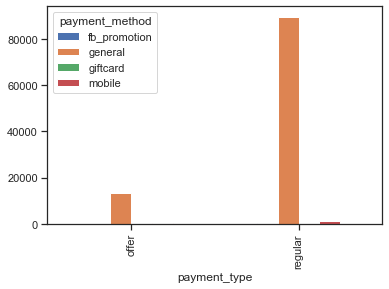

In [93]:
tab.plot.bar()

**1.2.** Analyze the relationship between **payment_type** and **crystalls_balance_before_buy** using Chi-square statistical test. Is the Chi-square test applicable for this pair of variables? If yes, formulate hypotheses, interpret the results of analysis and make conclusions. Create a suitable graph to demonstrate the relationship between these two variables.

The Chi-square cannot be applied since the variables are numeric and categorical.

---

### Task 2. Scatterplot. Normality test. Correlation. Use data_games.dta file.

**2.1.** Create a scatterplot between **crystalls_balance_before_buy** and **payment**. Copy the scatterplot into this file.

In [94]:
df = pd.read_stata('data/data_games.dta')
df.head()

,id,pack_id,crystalls_balance_before_buy,crystalls_bought,country,payment,utc_timestamp,payment_type,payment_method
0,2.052791e+09,3.0,0.0,41.0,GB,644.0,1.414842e+09,offer,general
1,1.275033e+09,1.0,10.0,7.0,US,205.0,1.414814e+09,offer,general
2,2.000015e+14,2.0,2.0,14.0,US,514.0,1.414866e+09,regular,general
3,1.119068e+09,4.0,0.0,70.0,GB,1289.0,1.414917e+09,regular,general
4,2.000028e+14,3.0,0.0,30.0,US,1029.0,1.414946e+09,regular,general


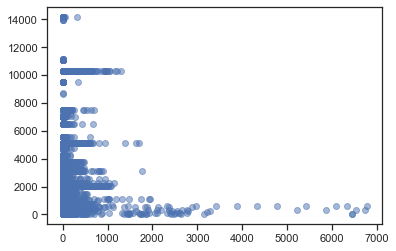

In [95]:
plt.scatter(df.crystalls_balance_before_buy, df.payment, marker = "o", alpha = 0.5)
plt.show()

**2.2.** Run the suitable normality test to conclude whether the distribution of **payment** variable is significantly different from the normal. Formulate hypothesis. Make conclusions.

In [96]:
len(df.payment)

105507

Since the sample's size is much greater than 100, _Shapiro-Wilks test_ is not suitable. So we will use _Kolmogorov-Smirnov_ normality test

We define the following hypothesis:

H0: Distribution of variable _payment_ is **not significantly different** from normal distribution.

H1: Distribution of variable _payment_ is **significantly different** from normal distribution.

In [97]:
alpha = 0.05
p = kstest(df.payment, 'norm').pvalue
print('P-value: ', p)
if p <= alpha:
    print('Reject H0')
else:
    print('Accept H0')

P-value:  0.0
Reject H0


Calculate an appropriate correlation coefficient between three pairs of variables. Fill in the table below. Interpret the results.


| Variables | Type of the appropriate correlation coefficient | Hypotheses | Strength of the relationship | Direction of the relationship | Significance of the relationship |
|:---|:---:|:---:|:---:|:---:|:---:|
| crystalls_balance_before_buy and payment | Spearman | H0: variables are independent | Very weak | Positive | 0.01 |
| crystalls_balance_before_buy and crystalls_bought | Kendall | H0: variables are independent | Very weak | Positive | 0.01 |
| crystalls_bought and payment | Pearson | H0: variables are independent | Strong | Positive | 0.01 |

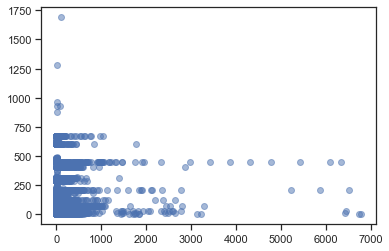

In [98]:
plt.scatter(df.crystalls_balance_before_buy, df.crystalls_bought, marker = "o", alpha = 0.5)

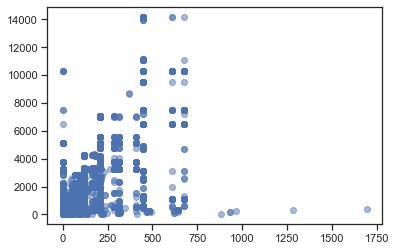

In [99]:
plt.scatter(df.crystalls_bought, df.payment, marker = "o", alpha = 0.5)

From the plots above we can see:

- _crystalls_balance_before_buy_ and _payment_ are distributed ordinarly and have significant number of ranks, so **Spearman's** correlation can be applied for this case
- _crystalls_balance_before_buy_ and _crystalls_bought_ are distributed ordinarly and ranks are tied closely, so **Kendalls's** correlation can be applied for this case
- _crystalls_bought_ and _payment_ are distributed ordinarly, but the number of ranks is quite the same, moreover, we can see some kind of linear relation, so the **Pearson's** correlation can be applied for this case

In [100]:
spear = spearmanr(df.crystalls_balance_before_buy, df.payment)
kendal = kendalltau(df.crystalls_balance_before_buy, df.crystalls_bought)
pearson = pearsonr(df.crystalls_bought, df.payment)

In [101]:
print("Spearman corr = {}, p-value = {}\nKendal corr = {}, p-value = {}\nPearson corr = {}, p-value = {}"
      .format(spear[0], spear[1], kendal[0], kendal[1], pearson[0], pearson[1]))

Spearman corr = 0.1457859347733024, p-value = 0.0
Kendal corr = 0.11117243493392964, p-value = 0.0
Pearson corr = 0.8511458031730847, p-value = 0.0


---

### Task 3. Partial correlation. Use health_funding.dta file.

Calculate paired correlation coefficient between **funding** and **disease** variables. Now calculate the correlation coefficient between the same pair of variables controlling for the number of visits (**visits** variable). Interpret the results of analysis.

In [102]:
df = pd.read_stata('data/health_funding.dta')
df.head()

,funding,disease,visits,citycode
0,155.330002,158.339996,152.130005,6.0
1,177.339996,157.229996,167.839996,27.0
2,165.089996,162.919998,162.210007,15.0
3,154.279999,130.589996,146.690002,4.0
4,185.559998,202.809998,186.929993,36.0


In [103]:
corr, _ = pearsonr(df.funding, df.disease)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.737


In [104]:
part = pg.partial_corr(data=df, x='funding', y='disease', covar=['visits'])
part.r

pearson    0.013
Name: r, dtype: float64

---

### Task 4. T-tests and Nonparametric tests.

**4.1.** Use **auto.dta** file (example datasets). Select an appropriate test to check if there is a difference in the mean length of foreign and non-foreign cars. Explain you selection. Formulate the hypotheses. Interpret the results of analysis. 

In [105]:
df = pd.read_stata('data/auto.dta')
df.head()

,make,price,mpg,rep78,headroom,trunk,weight,length,turn,displacement,gear_ratio,foreign
0,AMC Concord,4099,22,3.0,2.5,11,2930,186,40,121,3.58,Domestic
1,AMC Pacer,4749,17,3.0,3.0,11,3350,173,40,258,2.53,Domestic
2,AMC Spirit,3799,22,NaN,3.0,12,2640,168,35,121,3.08,Domestic
3,Buick Century,4816,20,3.0,4.5,16,3250,196,40,196,2.93,Domestic
4,Buick Electra,7827,15,4.0,4.0,20,4080,222,43,350,2.41,Domestic


In [106]:
df.foreign.unique()

[Domestic, Foreign]
Categories (2, object): [Domestic < Foreign]

In [107]:
stat, p = ttest_ind(df[df['foreign'] == 'Domestic'].length, df[df['foreign'] == 'Foreign'].length)
print('P-value: %f' % p)

P-value: 0.000000


There is no difference in the mean lengths of foreign and domestic cars

**4.2.** Use **data_games.dta** file. Select an appropriate test to understand whether there is a difference in payments between the people who have used different payment types. Explain you selection. Formulate the hypotheses. Interpret the results of analysis. 

In [108]:
df = pd.read_stata('data/data_games.dta')
df.head()

,id,pack_id,crystalls_balance_before_buy,crystalls_bought,country,payment,utc_timestamp,payment_type,payment_method
0,2.052791e+09,3.0,0.0,41.0,GB,644.0,1.414842e+09,offer,general
1,1.275033e+09,1.0,10.0,7.0,US,205.0,1.414814e+09,offer,general
2,2.000015e+14,2.0,2.0,14.0,US,514.0,1.414866e+09,regular,general
3,1.119068e+09,4.0,0.0,70.0,GB,1289.0,1.414917e+09,regular,general
4,2.000028e+14,3.0,0.0,30.0,US,1029.0,1.414946e+09,regular,general


In [109]:
df['payment_type'].unique()

[offer, regular]
Categories (2, object): [offer < regular]

In [110]:
stat, p = ttest_ind(df[df['payment_type'] == 'offer'].payment, df[df['payment_type'] == 'regular'].payment)
print('P-value: %f' % p)

P-value: 0.003650


There is no difference in payments between the people who have used different payment types

**4.3.** Use **data_games.dta** file. Select an appropriate test to understand whether there is a difference in payments between the people who have used different payment methods. Explain you selection. Formulate the hypotheses. Interpret the results of analysis.

In [111]:
df = pd.read_stata('data/data_games.dta')
df.head()

,id,pack_id,crystalls_balance_before_buy,crystalls_bought,country,payment,utc_timestamp,payment_type,payment_method
0,2.052791e+09,3.0,0.0,41.0,GB,644.0,1.414842e+09,offer,general
1,1.275033e+09,1.0,10.0,7.0,US,205.0,1.414814e+09,offer,general
2,2.000015e+14,2.0,2.0,14.0,US,514.0,1.414866e+09,regular,general
3,1.119068e+09,4.0,0.0,70.0,GB,1289.0,1.414917e+09,regular,general
4,2.000028e+14,3.0,0.0,30.0,US,1029.0,1.414946e+09,regular,general


In [112]:
df.payment_method.unique()

[general, mobile, fb_promotion, giftcard]
Categories (4, object): [fb_promotion < general < giftcard < mobile]

In [113]:
stat, p = kruskal(df[df['payment_method'] == 'fb_promotion'].payment,
                  df[df['payment_method'] == 'general'].payment,
                  df[df['payment_method'] == 'giftcard'].payment,
                  df[df['payment_method'] == 'mobile'].payment)
print('P-value: %f' % p)

P-value: 0.000000


There is no difference in payments between the people who have used different payment methods